### [KNN 기반 분류 모델 - 생선 품종 분류]
- 데이터셋 : fish.csv
- 주 제 : 2가지 생선 품종을 분류 => 2진 분류
- 타 겟 : Species
- 피 쳐 : 무게 와 길이 중에서 2개 생선 품종을 잘 분류 해주는 피쳐 선택
- 학습종류 : 지도 학습 / 분류 
- 알고리즘 : KNN 기반 분류 진행


[1] 모듈로딩 및 데이터 준비 <hr>

In [18]:
# [1-1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib 
import numpy as np


In [19]:
#[1-2] 데이터 준비 
datafile = '../Data/fish.csv'

In [20]:
fish_df  = pd.read_csv(datafile, usecols=[0,1,2])

In [21]:
fish_df.head(3)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5


In [22]:
fish_df.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

[2] 데이터 추출 <hr>

In [23]:
# - Bream, Smelt 2개 품종 데이터 추출

bool_index = (fish_df['Species'] =='Bream') | (fish_df['Species'] =='Smelt' )

bool_index.sum()

np.int64(49)

In [24]:
# - 불린 인덱스의 값이 True인 행만 추출
data_DF = fish_df[bool_index]
data_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


[3] 데이터 정리 <hr>

In [25]:
# [3-1] 인덱스 정리
data_DF.reset_index(drop=True, inplace=True)
data_DF.index

RangeIndex(start=0, stop=49, step=1)

In [26]:
# [3-2] 타겟 컬럼의 Object => int 변환
from sklearn.preprocessing import LabelEncoder

labelEn = LabelEncoder()
# 품종 컬럼을 학습
labelEn.fit(data_DF['Species'])
print(f'labelEn : {labelEn.classes_}')

targetNP = labelEn.transform(data_DF['Species'])

print(f'targetNP : {type(targetNP)},{targetNP.shape}, {np.unique(targetNP)}')

labelEn : ['Bream' 'Smelt']
targetNP : <class 'numpy.ndarray'>,(49,), [0 1]


In [27]:
# [3-3] 피쳐 추출
featureNP = data_DF[ data_DF.columns[1:]].values

print(f'featureNP:{type(featureNP)}, {featureNP.shape}')

featureNP:<class 'numpy.ndarray'>, (49, 2)


[4] 기계 학습 준비 <hr>

## 학습용 & 테스트용 데이터셋 분리

In [28]:
# 정규화 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(featureNP,
													targetNP,
													random_state=42,
													stratify=targetNP) # stratify 분류시 적용


# StandardScaler 객체 생성
scaler = StandardScaler()

# 훈련 데이터에 맞춰 스케일러 학습 후 변환
X_train_scaled = scaler.fit_transform(X_train)

# 테스트 데이터 변환 (훈련 데이터의 기준을 그대로 사용해야 함)
X_test_scaled = scaler.transform(X_test)




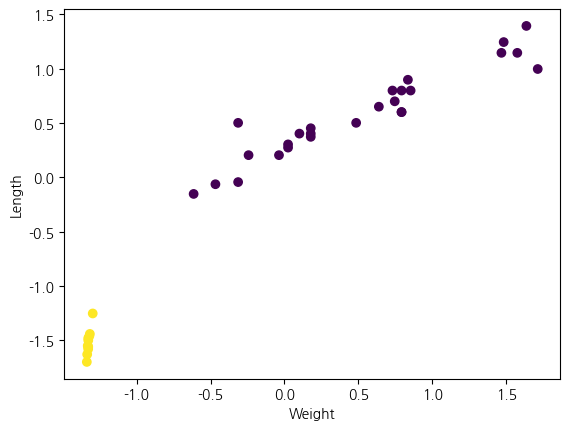

In [29]:
# 강사님 코드

plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1], c=y_train)
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

In [30]:
print(f' X_train : {X_train_scaled.shape}, y_train: {y_train.shape}')
print(f'X_test : { X_test_scaled.shape}, y_test:{y_test.shape}')

 X_train : (36, 2), y_train: (36,)
X_test : (13, 2), y_test:(13,)


In [31]:
np.unique_counts(y_train)

UniqueCountsResult(values=array([0, 1]), counts=array([26, 10]))

In [32]:
print(np.unique_counts(y_train))
print(np.unique_counts(y_test))

UniqueCountsResult(values=array([0, 1]), counts=array([26, 10]))
UniqueCountsResult(values=array([0, 1]), counts=array([9, 4]))


[5] 학습 진행 <hr>

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn_Classifer = KNeighborsClassifier()

knn_Classifer.fit(X_train_scaled,y_train)



KNeighborsClassifier()

In [50]:
# 분류 모델 성능 체크 ==> 정확도 accuracy 가 성능 체크로 사용됨

score_test = knn_Classifer.score(X_test_scaled,y_test)
score_tain = knn_Classifer.score(X_train_scaled,y_train)

In [51]:
print(score_tain, score_test)

1.0 1.0


[6] 성능 지표 평가 <hr>

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
# 예측값 계산
pre_ = knn_Classifer.predict(X_test)

precision = precision_score(y_test, pre_)
recall = recall_score(y_test,pre_)

f1 = f1_score(y_test,pre_)

print(precision,recall,f1)

1.0 1.0 1.0


In [38]:
# 분류  성능평가 보고서
print(classification_report(y_test,pre_, output_dict=True))

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 13.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 13.0}}


In [39]:
# 오차행렬 
confusion_matrix(y_test,pre_)

array([[9, 0],
       [0, 4]])

[7] 예측 및 시각화 <hr> 

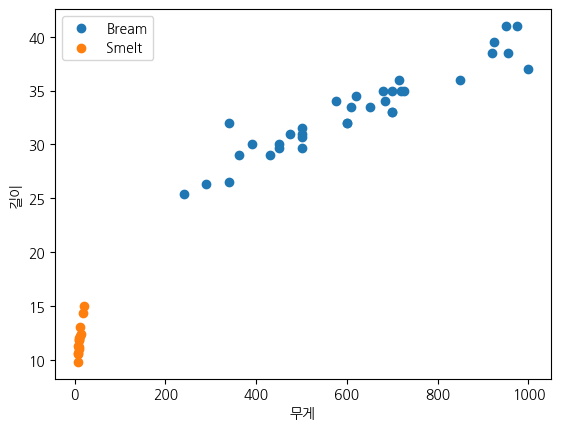

In [40]:

Bream = data_DF['Species'] == 'Bream' 
Smelt = data_DF['Species'] == 'Smelt'
#Weight	Length
plt.scatter(data_DF[Bream]['Weight'],data_DF[Bream]['Length'], label = 'Bream')
plt.scatter(data_DF[Smelt]['Weight'],data_DF[Smelt]['Length'], label = 'Smelt')

plt.xlabel('무게')
plt.ylabel('길이')

plt.legend()
plt.show()

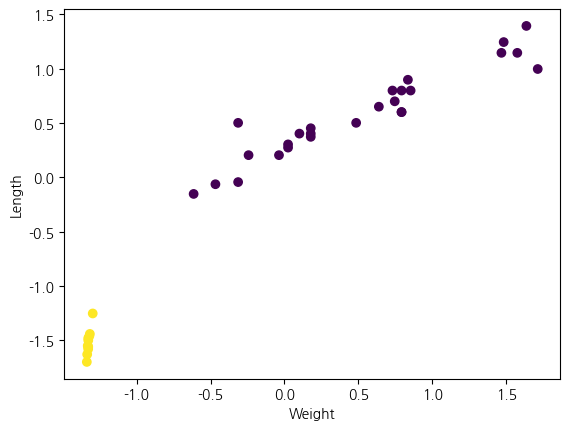

In [52]:
# 강사님 코드

plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train)
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

In [42]:
# 임의의 값 지정

new_data = np.array([[150.,24.]])

In [43]:
# 예측하기
pre_new_data = knn_Classifer.predict(new_data)


# 넘파이에서 값이 1개 잇는 경우, 스칼라라 함 => 0차원 item() 값 추출 
print(pre_new_data.item())

labelEn.classes_[pre_new_data.item()]

#knn_Classifer.classes_

1


'Smelt'

In [44]:
# 예측값 확인 ==> 친구들 찾기 
distance,heighborIdx = knn_Classifer.kneighbors(new_data)

In [45]:
heighborIdx= heighborIdx.reshape(-1)
heighborIdx

array([11, 20, 13, 22, 15])

In [46]:
X_train[heighborIdx][:,0], X_train[:,1]

(array([242. ,  19.7,  13.4,  12.2, 290. ]),
 array([35. , 29. , 11.3, 30.7, 11.2, 38.5, 11.8, 32. , 12. , 36. , 33. ,
        25.4, 37. , 12.4,  9.8, 26.3, 35. , 31. , 11. , 29.7, 14.3, 35. ,
        12.2, 31.5, 41. , 33.5, 33. , 10.5, 26.5, 32. , 39.5, 31. , 30. ,
        29. , 38.5, 34. ]))

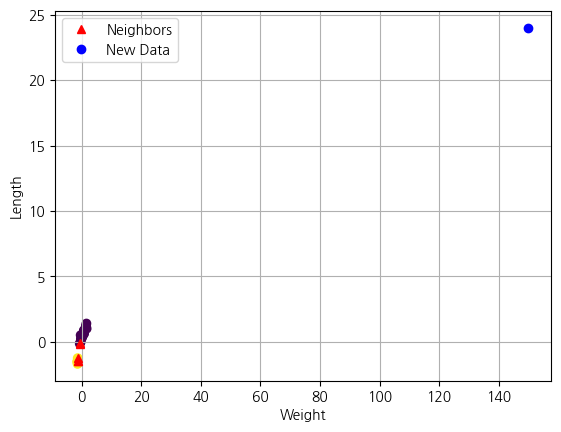

In [53]:
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train)

plt.plot(X_train_scaled[heighborIdx][:,0], X_train_scaled[heighborIdx][:,1],'r^',label='Neighbors')
plt.plot(new_data[0][0], new_data[0][1], 'bo', label='New Data')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.grid()
plt.legend()
plt.show()

In [48]:
y_train[heighborIdx]

array([0, 1, 1, 1, 0])